In [68]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Importing text from wikipedia

In [69]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [70]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

#### Creating a table and extracting values from the 3 columns

In [71]:
My_table = soup.find('table',{'class':'wikitable sortable'})

In [72]:
links2= My_table.findAll('td')
links2

[<td>M1A</td>, <td>Not assigned</td>, <td>Not assigned
 </td>, <td>M2A</td>, <td>Not assigned</td>, <td>Not assigned
 </td>, <td>M3A</td>, <td><a href="/wiki/North_York" title="North York">North York</a></td>, <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td>, <td>M4A</td>, <td><a href="/wiki/North_York" title="North York">North York</a></td>, <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td>, <td>M5A</td>, <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>, <td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
 </td>, <td>M5A</td>, <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>, <td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
 </td>, <td>M6A</td>, <td><a href="/wiki/North_York" title="North York">North York</a></td>, <td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights

In [73]:
dat=[]
for sub_heading in My_table.find_all('td'):
    dat.append(sub_heading.text)

In [74]:
for sub_heading in My_table.find_all('td'):
    print(sub_heading.text)

M1A
Not assigned
Not assigned

M2A
Not assigned
Not assigned

M3A
North York
Parkwoods

M4A
North York
Victoria Village

M5A
Downtown Toronto
Harbourfront

M5A
Downtown Toronto
Regent Park

M6A
North York
Lawrence Heights

M6A
North York
Lawrence Manor

M7A
Queen's Park
Not assigned

M8A
Not assigned
Not assigned

M9A
Etobicoke
Islington Avenue

M1B
Scarborough
Rouge

M1B
Scarborough
Malvern

M2B
Not assigned
Not assigned

M3B
North York
Don Mills North

M4B
East York
Woodbine Gardens

M4B
East York
Parkview Hill

M5B
Downtown Toronto
Ryerson

M5B
Downtown Toronto
Garden District

M6B
North York
Glencairn

M7B
Not assigned
Not assigned

M8B
Not assigned
Not assigned

M9B
Etobicoke
Cloverdale

M9B
Etobicoke
Islington

M9B
Etobicoke
Martin Grove

M9B
Etobicoke
Princess Gardens

M9B
Etobicoke
West Deane Park

M1C
Scarborough
Highland Creek

M1C
Scarborough
Rouge Hill

M1C
Scarborough
Port Union

M2C
Not assigned
Not assigned

M3C
North York
Flemingdon Park

M3C
North York
Don Mills South


#### Reordering data in the 3 initial columns

In [75]:
# define the dataframe columns
column_names2 = ['PC'] 

# instantiate the dataframe
neighborhoods2 = pd.DataFrame(columns=column_names2)

In [76]:
import pandas as pd
df2= pd.DataFrame()
df2['PC'] = dat
df2.head()

,PC
0,M1A
1,Not assigned
2,Not assigned\n
3,M2A
4,Not assigned


In [77]:
PostalCode=df2.iloc[::3, :]
PostalCode2=PostalCode.reset_index(drop=True)
PostalCode2.head()

,PC
0,M1A
1,M2A
2,M3A
3,M4A
4,M5A


In [78]:
Borough2=df2.iloc[1::3, :]
Borough3=Borough2.reset_index(drop=True)
Borough3.head()

,PC
0,Not assigned
1,Not assigned
2,North York
3,North York
4,Downtown Toronto


In [79]:
Neighbourhood=df2.iloc[2::3, :]
Neighbourhood2=Neighbourhood.reset_index(drop=True)
Neighbourhood2.head()

,PC
0,Not assigned\n
1,Not assigned\n
2,Parkwoods\n
3,Victoria Village\n
4,Harbourfront\n


In [80]:
# define the dataframe columns
column_names2 = ['PostalCode','Borough','Neighbourhood'] 

# instantiate the dataframe
neighborhoods2 = pd.DataFrame(columns=column_names2)

In [81]:
import pandas as pd
df3= pd.DataFrame()
df3['PostalCode'] = PostalCode2['PC']
df3['Borough'] = Borough3['PC']
df3['Neighbourhood']= Neighbourhood2['PC']

In [82]:
df3.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned\n
1,M2A,Not assigned,Not assigned\n
2,M3A,North York,Parkwoods\n
3,M4A,North York,Victoria Village\n
4,M5A,Downtown Toronto,Harbourfront\n


#### Cleaning data and dealing with Not assigned values

In [83]:
df3['Neighbourhood']=df3['Neighbourhood'].str.replace('\n','')

In [84]:
df3.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [85]:
df4=df3.replace('Not assigned', np.nan)

In [86]:
df4.head()

,PostalCode,Borough,Neighbourhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [87]:
df5 = df4[pd.notnull(df4['Borough'])]

In [88]:
df6=df5.reset_index(drop=True)
df6.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights


In [89]:
nei=np.where(pd.isnull(df6.Neighbourhood), df6.Borough, df6.Neighbourhood)
nei

array(['Parkwoods', 'Victoria Village', 'Harbourfront', 'Regent Park',
       'Lawrence Heights', 'Lawrence Manor', "Queen's Park",
       'Islington Avenue', 'Rouge', 'Malvern', 'Don Mills North',
       'Woodbine Gardens', 'Parkview Hill', 'Ryerson', 'Garden District',
       'Glencairn', 'Cloverdale', 'Islington', 'Martin Grove',
       'Princess Gardens', 'West Deane Park', 'Highland Creek',
       'Rouge Hill', 'Port Union', 'Flemingdon Park', 'Don Mills South',
       'Woodbine Heights', 'St. James Town', 'Humewood-Cedarvale',
       'Bloordale Gardens', 'Eringate', 'Markland Wood',
       'Old Burnhamthorpe', 'Guildwood', 'Morningside', 'West Hill',
       'The Beaches', 'Berczy Park', 'Caledonia-Fairbanks', 'Woburn',
       'Leaside', 'Central Bay Street', 'Christie', 'Cedarbrae',
       'Hillcrest Village', 'Bathurst Manor', 'Downsview North',
       'Wilson Heights', 'Thorncliffe Park', 'Adelaide', 'King',
       'Richmond', 'Dovercourt Village', 'Dufferin',
       'Scarborou

In [90]:
df6['Neighbourhood']=nei

In [91]:
df6

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M5A,Downtown Toronto,Regent Park
4,M6A,North York,Lawrence Heights
5,M6A,North York,Lawrence Manor
6,M7A,Queen's Park,Queen's Park
7,M9A,Etobicoke,Islington Avenue
8,M1B,Scarborough,Rouge
9,M1B,Scarborough,Malvern


In [92]:
df6.shape

(212, 3)

#### Importing json and location file

In [93]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [94]:
!wget -q -O 'torontoloc.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')

Data downloaded!


In [95]:
toronto_df = pd.read_csv('torontoloc.csv')
toronto_df['PostalCode']=toronto_df['Postal Code']
toronto_df2=toronto_df.drop(['Postal Code'], axis=1)
toronto_df2.head()

,Latitude,Longitude,PostalCode
0,43.806686,-79.194353,M1B
1,43.784535,-79.160497,M1C
2,43.763573,-79.188711,M1E
3,43.770992,-79.216917,M1G
4,43.773136,-79.239476,M1H


In [96]:
left=df6
right=toronto_df2
df7=pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('PostalCode', 'Postal Code'), copy=True, indicator=False,
         validate=None)

In [97]:
df7.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,Rouge,43.806686,-79.194353
1,M1B,Scarborough,Malvern,43.806686,-79.194353
2,M1C,Scarborough,Highland Creek,43.784535,-79.160497
3,M1C,Scarborough,Rouge Hill,43.784535,-79.160497
4,M1C,Scarborough,Port Union,43.784535,-79.160497


#### Creating map

In [98]:
address = 'Toronto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [99]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df7['Latitude'], df7['Longitude'], df7['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Clustering

In [100]:
X = np.array(df7[['Latitude','Longitude']])
y = np.array(df7['Neighbourhood'])
X.shape

(212, 2)

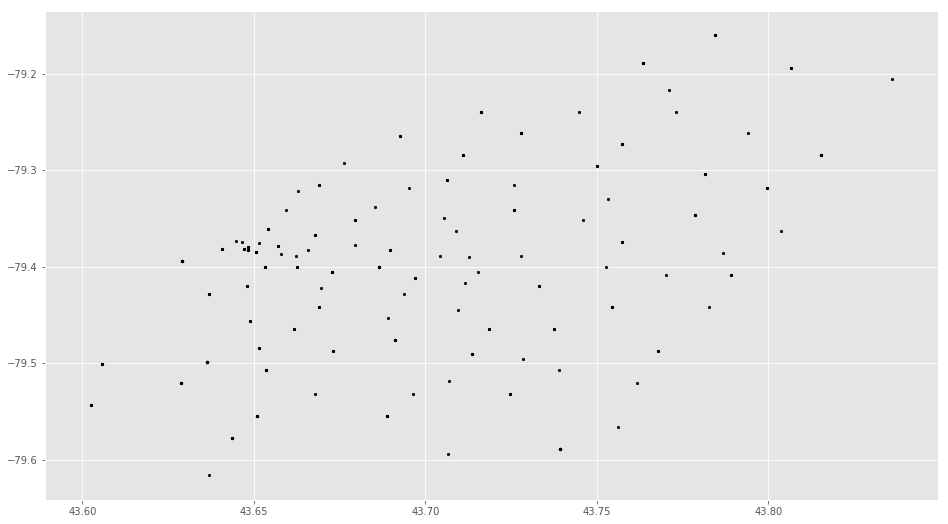

In [101]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Getting the values and plotting it
f1 = df7['Latitude'].values
f2 = df7['Longitude'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [102]:
# Number of clusters
k = 5
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[15. 12.]
 [ 7. 16.]
 [ 3. 16.]
 [ 7. 14.]
 [19.  2.]]


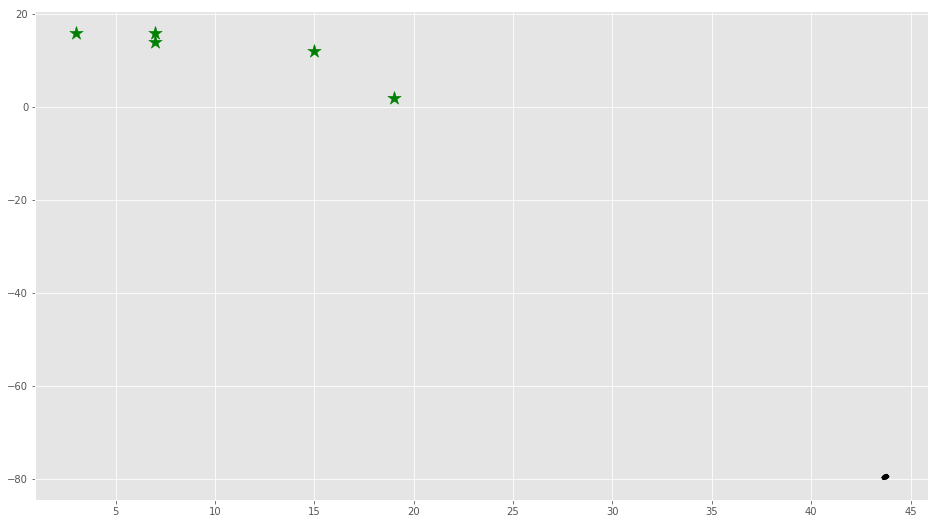

In [103]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [104]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [105]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5)
kclusters=5
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [106]:
df7['Cluster Labels']=kmeans.labels_

#### Creating cluster map

In [107]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df7['Latitude'], df7['Longitude'], df7['Neighbourhood'], df7['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters